### 统计学：检验心理学现象

#### 背景信息

在一个Stroop （斯特鲁普）任务中，参与者得到了一列文字，每个文字都用一种油墨颜色展示。参与者的任务是将文字的打印颜色大声说出来。这项任务有两个条件：一致文字条件，和不一致文字条件。在一致文字条件中，显示的文字是与它们的打印颜色匹配的颜色词，如“红色”、“蓝色”。在不一致文字条件中，显示的文字是与它们的打印颜色不匹配的颜色词，如“紫色”、“橙色”。在每个情况中，我们将计量说出同等大小的列表中的墨色名称的时间。每位参与者必须全部完成并记录每种条件下使用的时间。

#### 调查问题

(1) 我们的自变量是什么？因变量是什么？

实验中的自变量是文字条件是否一致，因变量是参与者说出同等长度列表中的墨色名称的时间。

(2) 此任务的适当假设集是什么？你需要以文字和数学符号方式对假设集中的零假设和对立假设加以说明，并对数学符号进行定义。你想执行什么类型的统计检验？为你的选择提供正当理由（比如，为何该实验满足你所选统计检验的前置条件）。

零假设：参与者说出文字条件一致的墨色名称所使用的平均时间与说出文字条件不一致的墨色名称所使用的平均时间相等（两个总体参数相等）。

$$H_{null}: \mu_{congruent} = \mu_{incongruent}$$ 

对立假设：参与者说出文字条件一致的墨色名称所使用的平均时间与说出文字条件不一致的墨色名称所使用的平均时间不相等（两个总体参数不相等）。

$$H_{null}: \mu_{congruent} \neq \mu_{incongruent}$$ 

我选择成对t检验来进行统计检验，原因如下：
1. 每个参与者都将分别进行“说出文字条件一致的墨色名称“和”文字条件不一致的墨色名称“两次实验，因此实验数据属于非独立且成对的；
2. 参与者的数量为24位，样本容量小于30，因此我们不能进行z检验（z检验要求样本容量至少大于30）；
3. 我们只有24位参与者的实验数据，而这24位参与者属于样本，因此我们没有总体的参数，例如总体的平均值或标准偏差，于是需要进行t检验。

成对t检验的假设前提如下：
1. 两组参与者均为总体中随机选择的样本；
2. 总体的分布接近正态分布；
3. 样本可以估计总体的方差。

现在轮到你自行尝试 Stroop 任务了。前往此链接，其中包含一个基于 Java 的小程序，专门用于执行 Stroop 任务。记录你收到的任务时间（你无需将时间提交到网站）。现在下载此数据集，其中包含一些任务参与者的结果。数据集的每行包含一名参与者的表现，第一个数字代表他们的一致任务结果，第二个数字代表不一致任务结果。

(3) 报告关于此数据集的一些描述性统计。包含至少一个集中趋势测量和至少一个变异测量。

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


In [3]:
df.describe()

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


从平均值来看，`Congruent`组的平均值约为14.05，明显小于`Incongruent`组平均值22.02。根据表格中最大值和最小值，`Congruent`组的最小值和最大值均小于`Incongruent`组。

Incongruent组的标准偏差大于Congruent组，说明`Incongruent`组的数据较`Congruent`组更为分散。

(4) 提供显示样本数据分布的一个或两个可视化。用一两句话说明你从图中观察到的结果。

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

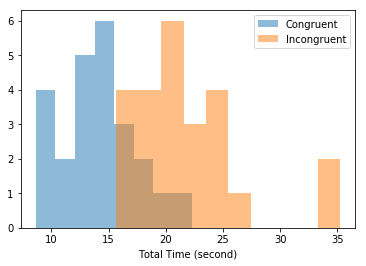

In [5]:
plt.hist(df['Congruent'], bins = 8, alpha = 0.5, label = 'Congruent')
plt.hist(df['Incongruent'], bins = 10, alpha = 0.5, label = 'Incongruent')
plt.legend(loc = 'best')
plt.xlabel('Total Time (second)');

通过上面的直方图来看，大部分的`Incongruent`组的数据位于`Congruent`组数据的右端，说明参与者在被要求说出文字条件一致的墨色名称所使用的时间相比说出不一致的墨色名称所使用的时间要更短。而且`Incongruent`组存在30以上的异常值，`Congruent`组却不存在任何25以上的数据，说明文字条件不一致时有可能会导致一些人花费的时间有显著的增长。

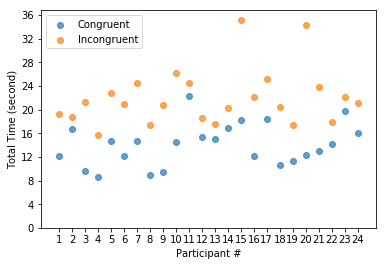

In [6]:
plt.scatter(np.arange(1, 25), df['Congruent'], alpha = 0.7, label = 'Congruent')
plt.scatter(np.arange(1, 25), df['Incongruent'], alpha = 0.7, label = 'Incongruent')
plt.xticks(range(1, 25))
plt.yticks(range(0, 40, 4))
plt.ylabel('Total Time (second)')
plt.xlabel('Participant #')
plt.legend(loc = 'best');

从上面的散点图来看，各个参与者在被要求说出文字条件不一致的墨色名称所使用的时间都比一致的墨色名称所使用的时间要更长，无一例外。甚至有些参与者的`Congruent`数据和`Incongruent`数据相差的秒数长达20秒左右。

(5) 现在，执行统计测试并报告你的结果。你的置信水平和关键统计值是多少？你是否成功拒绝零假设？对试验任务得出一个结论。结果是否与你的期望一致？

In [7]:
df['Difference'] = df['Incongruent'] - df['Congruent']
df.head()

,Congruent,Incongruent,Difference
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


In [8]:
# Calculate the standard deviation of the difference
std_difference = np.std(df['Difference'], ddof = 1)
std_difference

4.864826910359056

In [9]:
# Calculate the total number of participants in the experiment and the degree of freedom
n = df.shape[0]
degree_of_freedom = n - 1
print('number of participants: {}\ndegree of freedom: {}'.format(n, degree_of_freedom))

number of participants: 24
degree of freedom: 23


In [10]:
# Calculate the mean of incongruent, congruent and difference
congruent_mean = df['Congruent'].mean()
incongruent_mean = df['Incongruent'].mean()
mean_difference = incongruent_mean - congruent_mean
print('mean of congruent: {}\nmean of incongruent: {}\nmean of different: {}'.format(
      congruent_mean, incongruent_mean, mean_difference))

mean of congruent: 14.051125000000004
mean of incongruent: 22.01591666666667
mean of different: 7.964791666666665


http://www.statstutor.ac.uk/resources/uploaded/paired-t-test.pdf 这一网页提供了成对t检验的公式，如下所示。

$$
\frac{\bar{d}}{S_d/\sqrt{n}}
$$

由于我们在上面已经计算出了$\bar{d}$，$S_d$以及$n$的数值，现在我们可以直接套入公式计算t值。

In [11]:
# Calculate the t-score
t_score = mean_difference / (std_difference / n**0.5)
t_score

8.020706944109955

接下来利用`scipy.stats`的`t.ppf`函数来计算t-critical值，并得出置信区间。

我们进行的是双尾检验，alpha level设定为0.05，因此t-critical两端的概率为0.05/2，即0.025。

In [12]:
from scipy.stats import t
t_critical = t.ppf(1-0.025, degree_of_freedom)
t_critical

2.0686576104190406

In [13]:
# Calculate confidence interval
(mean_difference - t_critical*(std_difference/n**0.5), mean_difference + t_critical*(std_difference/n**0.5))

(5.9105554239684208, 10.019027909364908)

然后通过`t.sf`函数得出数据的p值。由于我们进行的是双尾实验，因此需要将单尾试验得出的概率乘以二。

In [14]:
p_val = t.sf(np.abs(t_score), degree_of_freedom)*2
p_val

4.1030005857111861e-08

根据alpha level为0.05得出的`t_critical`远远小于先前根据数据计算得出的`t_score`，而且通过实验数据计算出的`p_val`也远远小于我们的alpha level。这两个统计结果均说明结果具有统计显著性，我们应当拒绝零假设。

#### 结论
上面一系列的描述统计学信息说明了参与者说出文字条件一致的墨色名称所使用的时间与说出文字条件不一致的墨色名称所使用的平均时间并不相等，而且文字条件不一致时所使用的时间普遍超过文字条件一致时所使用的时间。

然后通过推论统计学的计算过程，我们发现，“参与者说出文字条件一致的墨色名称所使用的时间与说出文字条件不一致的墨色名称所使用的时间不相等”这一陈述具有统计显著性，说明实验结果在非常大的概率上并非出于偶然，符合斯特鲁普效应的结论。

#### 参考资料
"Stroop effect." Wikipedia. February 28, 2018. Accessed March 12, 2018. https://en.wikipedia.org/wiki/Stroop_effect.